## Тема "Обучение без учителя"
#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [68]:
from sklearn.datasets import load_boston

In [69]:
boston = load_boston()

In [70]:
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [71]:
X = pd.DataFrame(data, columns = feature_names)
y = pd.DataFrame(target, columns = ['price'])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
scaler = StandardScaler()

In [74]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [75]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [76]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

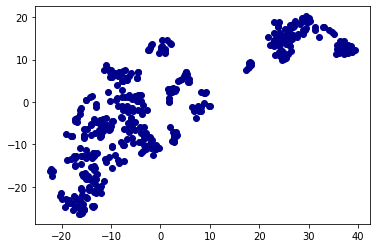

In [77]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = 'darkblue')
plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [78]:
from sklearn.cluster import KMeans

In [79]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [80]:
labels_train = kmeans.fit_predict(X_train_scaled)

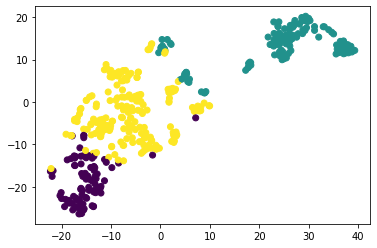

In [81]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.show()

In [82]:
print('Средние значения Price:')
print('Кластер 1:', y_train[labels_train == 0].mean())
print('Кластер 2:', y_train[labels_train == 1].mean())
print('Кластер 3:', y_train[labels_train == 2].mean())

Средние значения Price:
Кластер 1: price    27.788372
dtype: float64
Кластер 2: price    16.165354
dtype: float64
Кластер 3: price    24.958115
dtype: float64


In [83]:
print('Средние значения CRIM:')
print('Кластер 1:', X_train.loc[labels_train == 0, 'CRIM'].mean())
print('Кластер 2:', X_train.loc[labels_train == 1, 'CRIM'].mean())
print('Кластер 3:', X_train.loc[labels_train == 2, 'CRIM'].mean())

Средние значения CRIM:
Кластер 1: 0.07356558139534884
Кластер 2: 10.797028425196851
Кластер 3: 0.4216602094240837


#### Задание 3*
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [84]:
labels_test = kmeans.predict(X_test_scaled)

In [85]:
print('Средние значения Price:')
print('Кластер 1:', y_test[labels_test == 0].mean())
print('Кластер 2:', y_test[labels_test == 1].mean())
print('Кластер 3:', y_test[labels_test == 2].mean())

Средние значения Price:
Кластер 1: price    31.35
dtype: float64
Кластер 2: price    16.437143
dtype: float64
Кластер 3: price    21.860784
dtype: float64


In [86]:
print('Средние значения CRIM:')
print('Кластер 1:', X_test.loc[labels_test == 0, 'CRIM'].mean())
print('Кластер 2:', X_test.loc[labels_test == 1, 'CRIM'].mean())
print('Кластер 3:', X_test.loc[labels_test == 2, 'CRIM'].mean())

Средние значения CRIM:
Кластер 1: 0.06206
Кластер 2: 10.165531142857143
Кластер 3: 0.2660788235294118


#### Задание 4*
Обучите любую модель регрессии на этом же датасете. Добавьте новый признак - метка кластера, которую вы уже получили применив модель кластеризации к этим данным. Сравнить качество без метки кластера и с ней по отложенной выборке.


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [88]:
X_train['cluster'] = labels_train
X_test['cluster'] = labels_test

In [89]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'cluster'],
      dtype='object')

In [90]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_with_cluster = r2_score(y_pred, y_test)
r2_with_cluster

0.6334263913181183

In [91]:
X_train.drop('cluster', axis = 1, inplace=True)
X_test.drop('cluster', axis = 1, inplace=True)

In [92]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_without_cluster = r2_score(y_pred, y_test)
r2_without_cluster

0.6333247469014358

Вывод: ощутимой разницы нет, однако с наличием метки кластера показатель r2 чуть ближе к 1

#### Задание 5*
Загрузите "wine dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные и тестовые.
Масштабируйте данные.
Постройте модель понижения размерности на тренировочный данных, визуализируйте с помощью диаграммы рассеяния, подберите оптимальные гиперпараметры, чтобы сегментов на графике было столько, сколько классов в данных.
С помощью модели кластеризации разбейте данные из тренировочного набора на необходимое количество кластеров.
Постройте диаграмму рассеяния на данных, полученных с помощью понижения размерности и раскрасьте точки из разных кластеров разными цветами.
Убедитесь с помощью визуализации, что разбиение данных из тестового набора получилось успешным.
Сделайте вывод, какие модели лучше себя показывают на этой задаче.



In [93]:
from sklearn.datasets import load_wine

In [94]:
wine = load_wine()

In [95]:
data = wine.data
target = wine.target
feature_names = wine.feature_names

In [96]:
X = pd.DataFrame(data, columns = feature_names)
y = pd.DataFrame(target, columns = ['class'])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [98]:
scaler = StandardScaler()

In [99]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

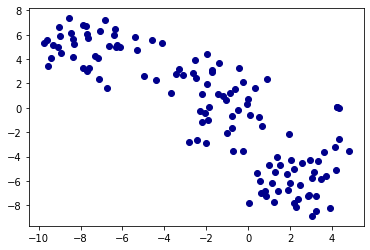

In [100]:
#экспериментировала с величиной learning rate чтобы добиться максимального выделения каждого класса на графике

tsne = TSNE(n_components=2, learning_rate=130, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = 'darkblue')
plt.show()

In [101]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

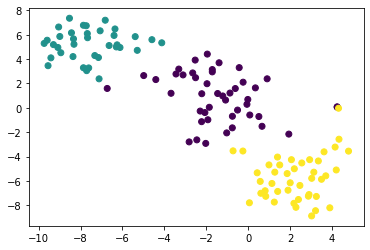

In [102]:
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.show()

In [103]:
labels_test = kmeans.predict(X_test_scaled)

**Agglomerative Clustering**

In [104]:
from sklearn.cluster import AgglomerativeClustering

In [105]:
aggcl = AgglomerativeClustering(n_clusters = 3)

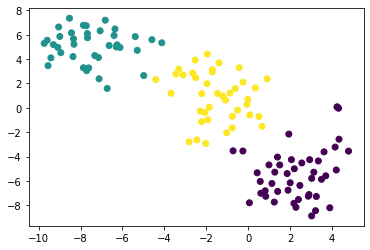

In [106]:
labels_train_agg = aggcl.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train_agg)
plt.show()

In [107]:
labels_test = kmeans.predict(X_test_scaled)

#### Задание 6*
Используйте "Olivetti faces data-set from AT&T" из встроенных наборов данных библиотеки sklearn.
Обучить любую модель классификации на этом датасете до применения PCA (количество компонент подберите самостоятельно) и после него. Сравнить качество классификации по отложенной выборке.


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [109]:
from sklearn.datasets import fetch_olivetti_faces
ol_faces = fetch_olivetti_faces()

In [110]:
ol_faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [111]:
data = ol_faces.data
target = ol_faces.target

In [112]:
X = data
y = target

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [116]:
scaler = StandardScaler()

In [117]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [118]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [119]:
accuracy_score(y_test, y_pred)

0.975

In [121]:
from sklearn.decomposition import PCA

In [123]:
pca = PCA(random_state = 42)

In [124]:
pca.fit(X_train_scaled)

PCA(random_state=42)

In [137]:
X_train.shape

(280, 4096)

In [169]:
#подберем количество компонент метод проб
np.sum(pca.explained_variance_ratio_[:40])

# То есть если мы сохраним 60 компонент с наибольшей объясненной дисперсией, то сохраним примерно 86 % информации.
# Попробуем поработать с этим числом

0.8650907

In [170]:
pca = PCA(n_components=40, random_state = 42)

In [171]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [172]:
lr = LogisticRegression()

In [173]:
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.975

Таким образом, понизив размерность датасета, мы получили точность не ниже первоначальной. Проверим можно ли еще понизить размерность

In [177]:
for i in range (10, 40):
        pca = PCA(n_components=i, random_state = 42)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
        lr = LogisticRegression()
        lr.fit(X_train_pca, y_train)
        y_pred = lr.predict(X_test_pca)
        accs = accuracy_score(y_test, y_pred)
        print(f'Количество компонент : {i}, accuracy_score: {accs}')

Количество компонент : 10, accuracy_score: 0.825
Количество компонент : 11, accuracy_score: 0.8166666666666667
Количество компонент : 12, accuracy_score: 0.875
Количество компонент : 13, accuracy_score: 0.8666666666666667
Количество компонент : 14, accuracy_score: 0.9083333333333333
Количество компонент : 15, accuracy_score: 0.9
Количество компонент : 16, accuracy_score: 0.9166666666666666
Количество компонент : 17, accuracy_score: 0.925
Количество компонент : 18, accuracy_score: 0.925
Количество компонент : 19, accuracy_score: 0.9416666666666667
Количество компонент : 20, accuracy_score: 0.9166666666666666
Количество компонент : 21, accuracy_score: 0.9083333333333333
Количество компонент : 22, accuracy_score: 0.9166666666666666
Количество компонент : 23, accuracy_score: 0.9333333333333333
Количество компонент : 24, accuracy_score: 0.925
Количество компонент : 25, accuracy_score: 0.9333333333333333
Количество компонент : 26, accuracy_score: 0.95
Количество компонент : 27, accuracy_scor

Не снижая точность модели, можно сократить данные до 30 компонент. Снижая размерность до 20 компонент точность модели все равно будет 